Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChains
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-226.243,-235.875,2.39679e-68
2,140.151,4.0,-223.511,-233.128,3.73518e-67
3,140.302,4.0,-220.807,-230.411,5.65759e-66
4,140.452,4.0,-218.132,-227.721,8.32893e-65
5,140.603,4.0,-215.485,-225.06,1.19175e-63
6,140.754,4.0,-212.867,-222.428,1.65736e-62
7,140.905,4.0,-210.277,-219.824,2.2402e-61
8,141.055,4.0,-207.716,-217.249,2.94304e-60
9,141.206,4.0,-205.183,-214.702,3.75787e-59


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,152.814,11.2362,-73.0144,-81.634,0.231979
2,155.528,11.2362,-72.8416,-81.2995,0.324135
3,156.884,7.8593,-72.7573,-81.1414,0.379664
4,153.417,9.22613,-71.8873,-80.4694,0.74344
5,158.241,10.191,-73.4078,-81.7225,0.212332
6,155.678,10.2714,-72.2713,-80.7208,0.578179
7,153.719,8.66332,-71.7641,-80.3278,0.856506
8,156.131,7.77889,-72.3429,-80.7674,0.551853
9,153.417,8.90452,-71.8445,-80.4266,0.775931


### Snippet 4.23

Density of sigma

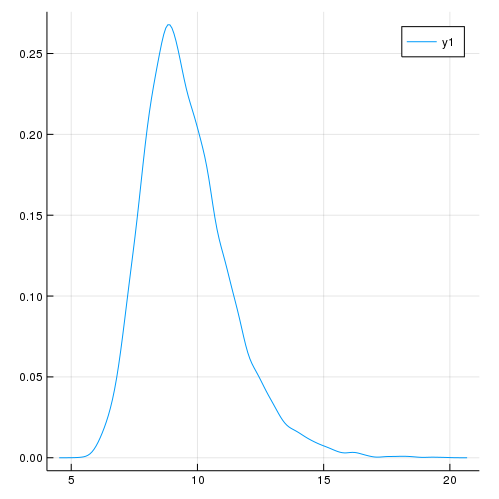

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*